# Set up the environment
## Install and import packages
The following cells install certain required packages and components into your virtual environment for working through each of the steps in this particular programme. 
Read the comments (any text that follows "#") for details of each line. The comments will also contain details of what elements can be changed for your individual use case where applicable.

If the packages and modules are already installed and configured correctly in the virtual environment from previous workbooks, the workbook will automatically skip over these packages when the cells are run. 

In [ ]:
# Install required packages
! pip install -r ../requirements.txt

In [1]:
# This workbook uses the following modules. A short description of the purpose of the module is included for reference.
import pandas as pd # This module is used for working with datasets

# The following modules are used for FLAIR sentiment analysis.
from flair.data import Sentence
from flair.nn import Classifier
from flair.splitter import SegtokSentenceSplitter

# The following modules are used for VADAR sentiment analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# The following packages are used for representing data.
import matplotlib.pyplot as plt # This module is used for plotting graphs
import seaborn as sns # This module is used for plotting graphs

## Configure sentiment classification tools
[FLAIR](https://flairnlp.github.io) is an NLP library designed for a variety of text analysis tasks, including sentiment analysis and named entity recognition (NER). It uses pre-trained models combining tagged lexicons for individual token analysis with its capacity to extract contextual information from surrouding tokens. 

[VADAR (Valence Aware Dictionary and sEntiment Reasoner)](https://vadersentiment.readthedocs.io/en/latest/) uses a pre-built lexicon of words associated with sentiment values. Functions using VADAR analyse the individual words that make up a string of text and tehn combine the scores to calculate an overall sentiment for the entire text.

The following cells configure the tools and define the functions used in the analysis.

In [93]:
# The first time you run this cell, the workbook may download and configure more components into the working environment. Depending on Internet connection speed, this may take several minutes. Before running this cell, consider battery life, memory capacity, and bandwidth.
# Advanced users may choose to download additional resources, but for basic sentiment analysis, the VADAR lexicon is sufficient.

# Download the lexicon for VADAR
nltk.download('vader_lexicon') # Add additional resources to this command if needed, e.g., 'punkt' for tokenization.

# Initialize the FLAIR sentiment classifier and load additional libraries
tagger = Classifier.load('sentiment') 

# Initialize the VADAR sentiment analysis tools
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/colemantharpe/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


If the virtual environment runs on a Mac OS computer and the above cell triggers problems with SSL certificates, the following command will install or update the certificates. 
Mac OS users should navigate to their Python installation directory (example: /Applications/Python 3.11/) and locate and open the 'Install Certificates.command' file. This command opens the Terminal and installs a curated bundle of root certificates.
Users can also open the Terminal and run the following command directly. 
```
/Applications/Python 3.<version>/Install Certificates.command
```
Note: The command directly references a file in the Python installation directory. If the Python directory is located at another path, use that path.

In [26]:
# Define functions to handle responses from FLAIR and VADAR sentiment analysis.
def flair_Tag(text):
    """
    Function to run FLAIR sentiment analysis on a given text.
    Returns the sentiment tag.
    """
    sentence = Sentence(text)
    tagger.predict(sentence)
    return sentence.tag

def flair_Score(text):
    """
    Function to run FLAIR sentiment analysis on a given text.
    Returns the sentiment score.
    """
    sentence = Sentence(text)
    tagger.predict(sentence)
    return sentence.score

def vadar_Neg(text):
    """
    Function to run VADAR sentiment analysis on a given text.
    Returns the negative score.
    """
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(text)
    return scores['neg']

def vadar_Pos(text):
    """
    Function to run VADAR sentiment analysis on a given text.
    Returns the positive score.
    """
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(text)
    return scores['pos']

def vadar_Neu(text):
    """
    Function to run VADAR sentiment analysis on a given text.
    Returns the neutral score.
    """
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(text)
    return scores['neu']

def vadar_Compound(text):
    """
    Function to run VADAR sentiment analysis on a given text.
    Returns the compound score.
    """
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(text)
    return scores['compound']

## Create the dataframe
Previous workbooks in this application save data generated data and analysis into the 'outputs' directory. The cell below creates a dataframe from a file generated and saved in the proceeding workbook ('outputs/textStatistics.csv'). However, the analysis in this workbook does not require quantitative data  generated by the steps in any previous workbooks. The cells below perform analysis with any text, regardless of its source. 

In [2]:
# use pandas to read a CSV file
df = pd.read_csv('../outputs/textStatistics.csv')  # replace 'outputs/textStatistics.csv' with your actual file path
df.head()

,museum_reference,title,description,date,style_culture,image,interpretation,GenAIinterpretation,tokens_used,wordCount,GenAIwordCount,sentenceCount,GenAIsentenceCount,fleschReadingEase,genAIfleschReadingEase,mcalpineEFLAW,genAImcalpineEFLAW
0,A.1911.397.243,Firestick,"Firestick, wood with a reed sheath decorated w...",19th - 20th century,Australian Aboriginal,A.1911.397.243.png,A common method for making fire was to rub two...,"Firesticks such as this, with a reed sheath an...",1258,29,60,2,3,72.510603,49.765000,20.500000,25.666667
1,A.1898.372.39,Vessel,"Vessel (coolamon), roughly elliptical with rai...",19th century,Australian Aboriginal,A.1898.372.39.png,Coolamon are wooden dishes moulded over a fire...,"This coolamon, an elliptical wooden vessel fro...",1273,25,67,2,4,68.939500,24.421810,16.500000,21.250000
2,A.1911.397.159,Bag,"String bag (dilly-bag), plant fibre: Australas...",19th - 20th century,Australian Aboriginal,A.1911.397.159.png,"Across Australia's Northern Territory, Aborigi...","Woven from plant fibres, this Australian Abori...",1258,49,61,3,4,71.126054,42.959529,21.666667,19.500000
3,K.2002.825,Basket,"Basket, bicornual with handle, cane plant: Aus...",19th century,Australian Aboriginal,K.2002.825.png,Crescent-shaped cane baskets were unique to th...,"Handwoven from cane plant, this bicornual bask...",1250,48,62,3,4,76.032500,41.005726,21.333333,19.500000
4,V.2008.25,Basket,"Basket with black, red and yellow strips runni...",c. 2007,Pitjantjatjara,V.2008.25.png,Colourful coiled baskets are popular tourist i...,"Woven by Alison (Milyika) Carroll in 2007, thi...",1290,48,62,3,3,51.357500,18.022849,21.666667,26.333333


## Test the sentiment analysis configuration
Previous cells configured the classification models and installed the required components. A successful test in the following cells will show the difference in results between the two different text classifiers.

In [95]:
# Test the sentiment analysis classifiers with a sample text

# Define a sample text for sentiment analysis.
text = df['GenAIinterpretation'][0]  # replace 0 with the index of the text you want to analyze

# Use FLAIR to predict the sentiment of the sample text
# Pre-process the text for FLAIR
sentence = Sentence(text) 

# Run sentiment analysis on the pre-processed text
tagger.predict(sentence)

# Print the sentence with all annotations
print(sentence.text)
print(sentence.tag)
print(sentence.score)

Firesticks such as this, with a reed sheath and Abrus precatorius seeds, were used by Australian Aboriginal peoples in daily life for creating fire—a vital source of warmth, light, and sustenance. The decorated sheath honours its role and the ingenuity of its makers, connecting generations through tradition and skill. How might this small object have shaped stories around the fire?
POSITIVE
0.9992535710334778


In [96]:
# Use VADAR to generate sentiment scores for the text
scores = analyzer.polarity_scores(text)

# print the text with all annotations
print(text)
print("Negative: ",scores['neg']) # The negative score indicates the proportion of the text that is negative.
print("Positive: ",scores['pos']) # The positive score indicates the proportion of the text that is positive.
print("Neutral: ",scores['neu']) # The neutral score indicates the proportion of the text that is neutral.
print("Compound: ",scores['compound']) # The compound score is a normalized, weighted, composite score that summarizes the overall sentiment of the text.

Firesticks such as this, with a reed sheath and Abrus precatorius seeds, were used by Australian Aboriginal peoples in daily life for creating fire—a vital source of warmth, light, and sustenance. The decorated sheath honours its role and the ingenuity of its makers, connecting generations through tradition and skill. How might this small object have shaped stories around the fire?
Negative:  0.036
Positive:  0.158
Neutral:  0.806
Compound:  0.802


# Use the Sentiment Analysis Tools
The following cells predicts sentiment for each interpretive text produced by the museum and produced by Generative AI using the sentiment analysis tools defined above and then saves the response alongside the collection metadata and interpretation in a dataframe for further analysis.

In [ ]:
# Predict the sentiment for each text in the dataframe

# Create lists to store the results
flairSentiment = []
flairScore = []
GenAIflairSentiment = []
GenAIflairScore = []
vadarNeg = []
vadarPos = []
vadarNeu = []
vadarCompound = []
GenAIvadarNeg = []
GenAIvadarPos = []
GenAIvadarNeu = []
GenAIvadarCompound = []

# Apply flairTag function to the 'interpretation' column and extend the list with the results
flairSentiment.extend(
    df['interpretation'].apply(flair_Tag)
)
# Apply flairScore function to the 'interpretation' column and extend the list with the results
flairScore.extend(
    df['interpretation'].apply(flair_Score)
)
# Apply flairTag function to the 'GenAIinterpretation' column and extend the list with the results
GenAIflairSentiment.extend(
    df['GenAIinterpretation'].apply(flair_Tag)   
)
# Apply flairScore function to the 'GenAIinterpretation' column and extend the list with the results
GenAIflairScore.extend(
    df['GenAIinterpretation'].apply(flair_Score)
)
# Apply vadarNeg function to the 'interpretation' column and extend the list with the results
vadarNeg.extend(
    df['interpretation'].apply(vadar_Neg)
)
# Apply vadarPos function to the 'interpretation' column and extend the list with the results
vadarPos.extend(
    df['interpretation'].apply(vadar_Pos)
)
# Apply vadarNeu function to the 'interpretation' column and extend the list with the results
vadarNeu.extend(
    df['interpretation'].apply(vadar_Neu)
)
# Apply vadarCompound function to the 'interpretation' column and extend the list with the results
vadarCompound.extend(
    df['interpretation'].apply(vadar_Compound)
)
# Apply vadarNeg function to the 'GenAIinterpretation' column and extend the list
GenAIvadarNeg.extend(
    df['GenAIinterpretation'].apply(vadar_Neg)
)
# Apply vadarPos function to the 'GenAIinterpretation' column and extend the list
GenAIvadarPos.extend(
    df['GenAIinterpretation'].apply(vadar_Pos)
)
# Apply vadarNeu function to the 'GenAIinterpretation' column and extend the list
GenAIvadarNeu.extend(
    df['GenAIinterpretation'].apply(vadar_Neu)
)
# Apply vadarCompound function to the 'GenAIinterpretation' column and extend the list
GenAIvadarCompound.extend(
    df['GenAIinterpretation'].apply(vadar_Compound)
)

# add the responses to the dataframe
df['flairSentiment'] = flairSentiment
df['flairScore'] = flairScore
df['GenAIflairSentiment'] = GenAIflairSentiment
df['GenAIflairScore'] = GenAIflairScore
df['vadarNeg'] = vadarNeg
df['vadarPos'] = vadarPos
df['vadarNeu'] = vadarNeu
df['vadarCompound'] = vadarCompound
df['GenAIvadarNeg'] = GenAIvadarNeg
df['GenAIvadarPos'] = GenAIvadarPos
df['GenAIvadarNeu'] = GenAIvadarNeu
df['GenAIvadarCompound'] = GenAIvadarCompound

# print the dataframe with the results
df.head()

,museum_reference,title,description,date,style_culture,image,interpretation,GenAIinterpretation,tokens_used,wordCount,...,GenAIflairSentiment,GenAIflairScore,vadarNeg,vadarPos,vadarNeu,vadarCompound,GenAIvadarNeg,GenAIvadarPos,GenAIvadarNeu,GenAIvadarCompound
0,A.1911.397.243,Firestick,"Firestick, wood with a reed sheath decorated w...",19th - 20th century,Australian Aboriginal,A.1911.397.243.png,A common method for making fire was to rub two...,"Firesticks such as this, with a reed sheath an...",1258,29,...,POSITIVE,0.999254,0.085,0.000,0.915,-0.3400,0.036,0.158,0.806,0.8020
1,A.1898.372.39,Vessel,"Vessel (coolamon), roughly elliptical with rai...",19th century,Australian Aboriginal,A.1898.372.39.png,Coolamon are wooden dishes moulded over a fire...,"This coolamon, an elliptical wooden vessel fro...",1273,25,...,POSITIVE,0.999967,0.094,0.000,0.906,-0.3400,0.000,0.000,1.000,0.0000
2,A.1911.397.159,Bag,"String bag (dilly-bag), plant fibre: Australas...",19th - 20th century,Australian Aboriginal,A.1911.397.159.png,"Across Australia's Northern Territory, Aborigi...","Woven from plant fibres, this Australian Abori...",1258,49,...,POSITIVE,0.999937,0.076,0.000,0.924,-0.4215,0.000,0.031,0.969,0.2263
3,K.2002.825,Basket,"Basket, bicornual with handle, cane plant: Aus...",19th century,Australian Aboriginal,K.2002.825.png,Crescent-shaped cane baskets were unique to th...,"Handwoven from cane plant, this bicornual bask...",1250,48,...,POSITIVE,0.999955,0.032,0.000,0.968,-0.1280,0.000,0.074,0.926,0.5859
4,V.2008.25,Basket,"Basket with black, red and yellow strips runni...",c. 2007,Pitjantjatjara,V.2008.25.png,Colourful coiled baskets are popular tourist i...,"Woven by Alison (Milyika) Carroll in 2007, thi...",1290,48,...,POSITIVE,0.999961,0.000,0.222,0.778,0.8834,0.000,0.091,0.909,0.7184


# Save the dataframe
Dataframes work very well within the virtual environment for a wide variety of computational tasks, but they are not designed for long-term data storage or for sharing and distribution. The following cell takes the data from the dataframe and store it in a persistent file format.

After saving the results of the workbook with the following cell, users can close the workbook and resume subsequent analysis later by re-loading the data using the first cell in the next section. 

In [ ]:
# use pandas to write a CSV file
df.to_csv('../outputs/textSentiment.csv', index=False)  # replace 'outputs/textSentiment.csv' with the preferred file path

# Visualise the results
The following cells use different methods to produce statistical graphics and tables using the results from analysing the interpretive texts using the methods in this workbook. These elements can be used to explore further aspects of the data through quantitative analysis.

This section contains a cell that merges the dataframe containing the results generated by this workbook with a another table. The additional table outlines the relationship between the production style or culture, geographic region, and the exhibit with the World Cultures, Living Lands gallery.

Not all explorations will require aggregation along more general categories. Users should consider what kinds of questions they want to explore through these results and what data best answer those questions.

The following visualisations use the following functions. The full configuration instructions are available in the linked documentation for each function.

[Matplotlib pie](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html)

[Seaborn boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

[Seaborn strip plot](https://seaborn.pydata.org/generated/seaborn.stripplot.html)

In [ ]:
# use pandas to read a CSV file
df = pd.read_csv('../outputs/textSentiment.csv')  # replace 'outputs/textSentiment.csv' with your actual file path
df.head()

,museum_reference,title,description,date,style_culture,image,interpretation,GenAIinterpretation,tokens_used,wordCount,...,GenAIflairSentiment,GenAIflairScore,vadarNeg,vadarPos,vadarNeu,vadarCompound,GenAIvadarNeg,GenAIvadarPos,GenAIvadarNeu,GenAIvadarCompound
0,A.1911.397.243,Firestick,"Firestick, wood with a reed sheath decorated w...",19th - 20th century,Australian Aboriginal,A.1911.397.243.png,A common method for making fire was to rub two...,"Firesticks such as this, with a reed sheath an...",1258,29,...,POSITIVE,0.999254,0.085,0.000,0.915,-0.3400,0.036,0.158,0.806,0.8020
1,A.1898.372.39,Vessel,"Vessel (coolamon), roughly elliptical with rai...",19th century,Australian Aboriginal,A.1898.372.39.png,Coolamon are wooden dishes moulded over a fire...,"This coolamon, an elliptical wooden vessel fro...",1273,25,...,POSITIVE,0.999967,0.094,0.000,0.906,-0.3400,0.000,0.000,1.000,0.0000
2,A.1911.397.159,Bag,"String bag (dilly-bag), plant fibre: Australas...",19th - 20th century,Australian Aboriginal,A.1911.397.159.png,"Across Australia's Northern Territory, Aborigi...","Woven from plant fibres, this Australian Abori...",1258,49,...,POSITIVE,0.999937,0.076,0.000,0.924,-0.4215,0.000,0.031,0.969,0.2263
3,K.2002.825,Basket,"Basket, bicornual with handle, cane plant: Aus...",19th century,Australian Aboriginal,K.2002.825.png,Crescent-shaped cane baskets were unique to th...,"Handwoven from cane plant, this bicornual bask...",1250,48,...,POSITIVE,0.999955,0.032,0.000,0.968,-0.1280,0.000,0.074,0.926,0.5859
4,V.2008.25,Basket,"Basket with black, red and yellow strips runni...",c. 2007,Pitjantjatjara,V.2008.25.png,Colourful coiled baskets are popular tourist i...,"Woven by Alison (Milyika) Carroll in 2007, thi...",1290,48,...,POSITIVE,0.999961,0.000,0.222,0.778,0.8834,0.000,0.091,0.909,0.7184


In [4]:
# Prepare the DataFrame for sentiment score comparison
df_sentiment = df[[
    'museum_reference',
    'title',
    'date',
    'style_culture',
    'flairSentiment',
    'flairScore',
    'GenAIflairSentiment',
    'GenAIflairScore',
    'vadarNeg',
    'vadarPos',
    'vadarNeu',
    'vadarCompound',
    'GenAIvadarNeg',
    'GenAIvadarPos',
    'GenAIvadarNeu',
    'GenAIvadarCompound',
    ]].copy()
df_sentiment.head(10)

,museum_reference,title,date,style_culture,flairSentiment,flairScore,GenAIflairSentiment,GenAIflairScore,vadarNeg,vadarPos,vadarNeu,vadarCompound,GenAIvadarNeg,GenAIvadarPos,GenAIvadarNeu,GenAIvadarCompound
0,A.1911.397.243,Firestick,19th - 20th century,Australian Aboriginal,POSITIVE,0.876666,POSITIVE,0.999254,0.085,0.000,0.915,-0.3400,0.036,0.158,0.806,0.8020
1,A.1898.372.39,Vessel,19th century,Australian Aboriginal,POSITIVE,0.997850,POSITIVE,0.999967,0.094,0.000,0.906,-0.3400,0.000,0.000,1.000,0.0000
2,A.1911.397.159,Bag,19th - 20th century,Australian Aboriginal,POSITIVE,0.932039,POSITIVE,0.999937,0.076,0.000,0.924,-0.4215,0.000,0.031,0.969,0.2263
3,K.2002.825,Basket,19th century,Australian Aboriginal,NEGATIVE,0.995500,POSITIVE,0.999955,0.032,0.000,0.968,-0.1280,0.000,0.074,0.926,0.5859
4,V.2008.25,Basket,c. 2007,Pitjantjatjara,POSITIVE,0.999936,POSITIVE,0.999961,0.000,0.222,0.778,0.8834,0.000,0.091,0.909,0.7184
5,A.1898.403,Necklace,19th century,Australian Aboriginal,POSITIVE,0.999938,POSITIVE,0.999973,0.038,0.159,0.804,0.7960,0.000,0.057,0.943,0.3071
6,A.1898.372.65,Sinew,19th century,Australian Aboriginal,POSITIVE,0.999852,POSITIVE,0.999961,0.000,0.098,0.902,0.6486,0.000,0.181,0.819,0.9100
7,A.UC.105,Cooking vessel,19th century,Australian Aboriginal,NEGATIVE,0.997930,POSITIVE,0.999976,0.000,0.072,0.928,0.2732,0.059,0.104,0.838,0.5574
8,K.1999.590 A,Mask,1998 - 1999,Kwakwaka'wakw,POSITIVE,0.998154,POSITIVE,0.999958,0.035,0.106,0.859,0.7430,0.035,0.104,0.861,0.5106
9,A.UC.272,Canoe,Early 19th century,Haida,POSITIVE,0.996579,POSITIVE,0.999947,0.065,0.068,0.867,-0.2023,0.000,0.069,0.931,0.4767


In [15]:
# Prepare the DataFrame for FLAIR sentiment score comparison
# Create a new DataFrame with the FLAIR sentiment score for both Museum and Generative AI
df_sentiment_flair = df_sentiment[['flairScore', 'GenAIflairScore']].copy()
df_sentiment_flair.rename(columns={'flairScore': 'Museum', 'GenAIflairScore': 'Generative AI'}, inplace=True) # renames the columns for clarity in plotting

# Prepare the DataFrame for VADAR compound score comparison
# Create a new DataFrame with the VADAR compound scores for both Museum and Generative AI
df_sentiment_vadar = df_sentiment[['vadarCompound', 'GenAIvadarCompound']].copy()
df_sentiment_vadar.rename(columns={'vadarCompound': 'Museum', 'GenAIvadarCompound': 'Generative AI'}, inplace=True) # renames the columns for clarity in plotting 

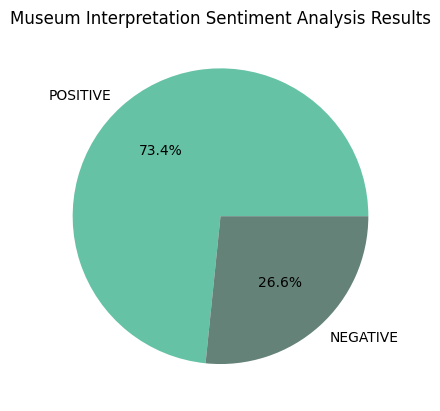

POSITIVE: 91
NEGATIVE: 33


In [ ]:
# Represent FLAIR sentiment tag for museum-generated interpretive texts
# Aggregate the data by FLAIR sentiment tag
flair_sentiment_counts = df_sentiment['flairSentiment'].value_counts()

# Define a color palette for museum-generated interpretation FLAIR sentiment tag, derived from Seaborn "Set2" palette 
colors = ['#66c2a5','#658279']

# Plot a pie chart
plt.pie(
    flair_sentiment_counts.values, labels=flair_sentiment_counts.index, 
    autopct='%1.1f%%',
    colors=colors
)
plt.title('Museum Interpretation Sentiment Analysis Results')

plt.show()

# Print the number of counts for each sentiment
for sentiment, count in flair_sentiment_counts.items():
    print(f"{sentiment}: {count}")

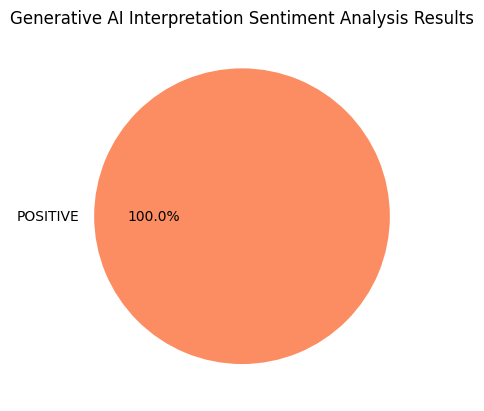

POSITIVE: 124


In [11]:
# Represent FLAIR sentiment tag for genereative AI interpretive texts
# Aggregate the data by FLAIR sentiment tag
genAI_flair_sentiment_counts = df_sentiment['GenAIflairSentiment'].value_counts()

# Define a color palette for museum-generated interpretation FLAIR sentiment tag, derived from Seaborn "Set2" palette 
colors = ['#fc8d62','#BD8C79']

# Plot a pie chart
plt.pie(
    genAI_flair_sentiment_counts.values, labels=genAI_flair_sentiment_counts.index, 
    autopct='%1.1f%%',
    colors=colors
)
plt.title('Generative AI Interpretation Sentiment Analysis Results')

plt.show()

# Print the number of counts for each sentiment
for sentiment, count in genAI_flair_sentiment_counts.items():
    print(f"{sentiment}: {count}")

In [13]:
# Display the descriptive statistics for the FLAIR sentiment scores in the dataframe
df_sentiment[['flairScore','GenAIflairScore']].describe()

,flairScore,GenAIflairScore
count,124.000000,124.000000
mean,0.939763,0.999635
std,0.106202,0.001456
min,0.540085,0.985511
25%,0.933030,0.999880
50%,0.993526,0.999956
75%,0.999024,0.999976
max,0.999997,0.999995


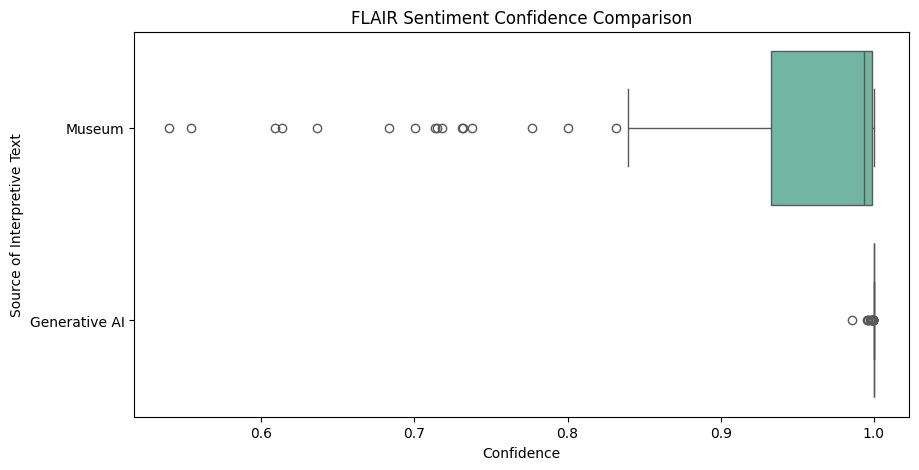

In [ ]:
# Plots a boxplot for FLAIR sentiment confidence comparison
fig, f_sen = plt.subplots(figsize=(10,5))
f_sen = sns.boxplot(
    x="value", 
    y="variable", 
    data=pd.melt(df_sentiment_flair),
    hue='variable',
    palette='Set2',
    orient='h'  # horizontal orientation for better readability
)
f_sen.set_title('FLAIR Sentiment Confidence Comparison')
f_sen.set_ylabel('Source of Interpretive Text')
f_sen.set_xlabel('Confidence')
plt.show()

In [ ]:
# Display the descriptive statistics for the VADAR sentiment scores in the dataframe
df_sentiment_vadar.describe()

,Museum,Generative AI
count,124.000000,124.000000
mean,0.231829,0.549574
std,0.436161,0.333677
min,-0.902200,-0.599400
25%,0.000000,0.318200
50%,0.261600,0.630900
75%,0.582150,0.832700
max,0.937100,0.953100


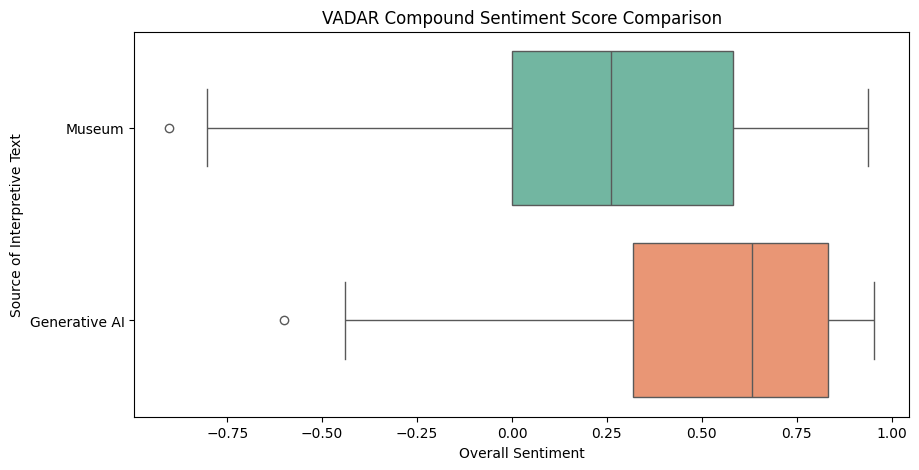

In [19]:
# Plots a boxplot for VADAR compound sentiment score comparison
fig, v_sen = plt.subplots(figsize=(10,5))
v_sen = sns.boxplot(
    x="value", 
    y="variable", 
    data=pd.melt(df_sentiment_vadar),
    hue='variable',
    palette='Set2',
    orient='h'  # horizontal orientation for better readability
)
v_sen.set_title('VADAR Compound Sentiment Score Comparison')
v_sen.set_ylabel('Source of Interpretive Text')
v_sen.set_xlabel('Overall Sentiment')
plt.show()

In [5]:
# This cell merges the dataframe containing the results obtained through this workbook with a dataframe containing the relationship between 'style_culture' and the exhibit

# Use pandas to read a CSV file
stylecutlure_geo_exhibit = pd.read_csv('data/styleculture_geo_exhibit.csv')  # replace 'styleculture_geo_exhibit.csv' with your actual file path

# Perform a merge on the two dataframes
df_sentiment_ext = df_sentiment.merge(
    stylecutlure_geo_exhibit,
    on = 'style_culture',
    how = 'left'
)
df_sentiment_ext.head()

,museum_reference,title,date,style_culture,flairSentiment,flairScore,GenAIflairSentiment,GenAIflairScore,vadarNeg,vadarPos,vadarNeu,vadarCompound,GenAIvadarNeg,GenAIvadarPos,GenAIvadarNeu,GenAIvadarCompound,geography,exhibit
0,A.1911.397.243,Firestick,19th - 20th century,Australian Aboriginal,POSITIVE,0.876666,POSITIVE,0.999254,0.085,0.000,0.915,-0.3400,0.036,0.158,0.806,0.8020,Australia,Land of Dreamings
1,A.1898.372.39,Vessel,19th century,Australian Aboriginal,POSITIVE,0.997850,POSITIVE,0.999967,0.094,0.000,0.906,-0.3400,0.000,0.000,1.000,0.0000,Australia,Land of Dreamings
2,A.1911.397.159,Bag,19th - 20th century,Australian Aboriginal,POSITIVE,0.932039,POSITIVE,0.999937,0.076,0.000,0.924,-0.4215,0.000,0.031,0.969,0.2263,Australia,Land of Dreamings
3,K.2002.825,Basket,19th century,Australian Aboriginal,NEGATIVE,0.995500,POSITIVE,0.999955,0.032,0.000,0.968,-0.1280,0.000,0.074,0.926,0.5859,Australia,Land of Dreamings
4,V.2008.25,Basket,c. 2007,Pitjantjatjara,POSITIVE,0.999936,POSITIVE,0.999961,0.000,0.222,0.778,0.8834,0.000,0.091,0.909,0.7184,Australia,Land of Dreamings


In [6]:
# Transform dataframe to represent VADAR compound score as long form for data visualisation
df_sentiment_ext.rename(columns={'vadarCompound': 'Museum', 'GenAIvadarCompound': 'Generative AI'}, inplace=True)
df_sentiment_plt = pd.melt(
    df_sentiment_ext,
    id_vars = ['style_culture','geography','exhibit'],
    value_vars = ['Museum','Generative AI'],
    var_name = 'Source',
    value_name = 'vadar_compound_score'
)
df_sentiment_plt.head()

,style_culture,geography,exhibit,Source,vadar_compound_score
0,Australian Aboriginal,Australia,Land of Dreamings,Museum,-0.3400
1,Australian Aboriginal,Australia,Land of Dreamings,Museum,-0.3400
2,Australian Aboriginal,Australia,Land of Dreamings,Museum,-0.4215
3,Australian Aboriginal,Australia,Land of Dreamings,Museum,-0.1280
4,Pitjantjatjara,Australia,Land of Dreamings,Museum,0.8834


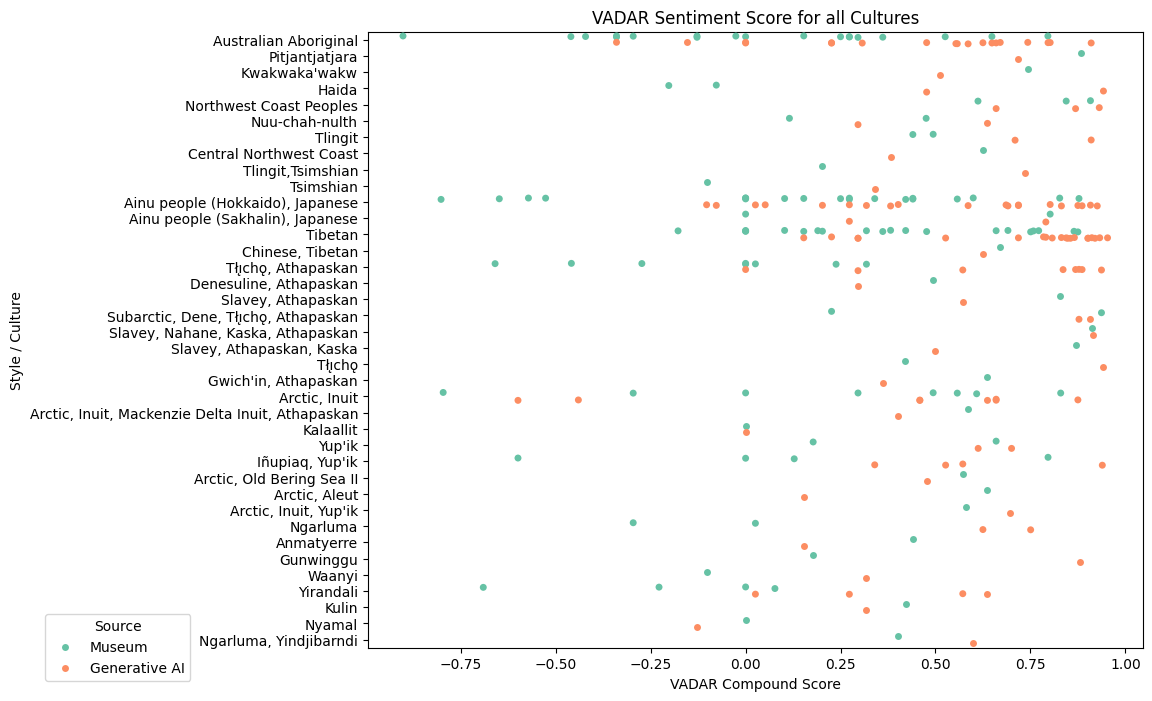

In [ ]:
# Plot a stripplot representing compound VADAR score for every style or culture of artifact 
fig, ax = plt.subplots(figsize=(10, 8))

sns.stripplot(
    data=df_sentiment_plt, 
    x="vadar_compound_score", 
    y="style_culture",
    hue = "Source",
    palette = "Set2",
    dodge=True,
    ax=ax
)

ax.set_title('VADAR Sentiment Score for all Cultures')
ax.set_ylabel('Style / Culture')
ax.set_xlabel('VADAR Compound Score')

sns.move_legend(
    ax, 
    "center right", 
    bbox_to_anchor=(-.22, 0)
)


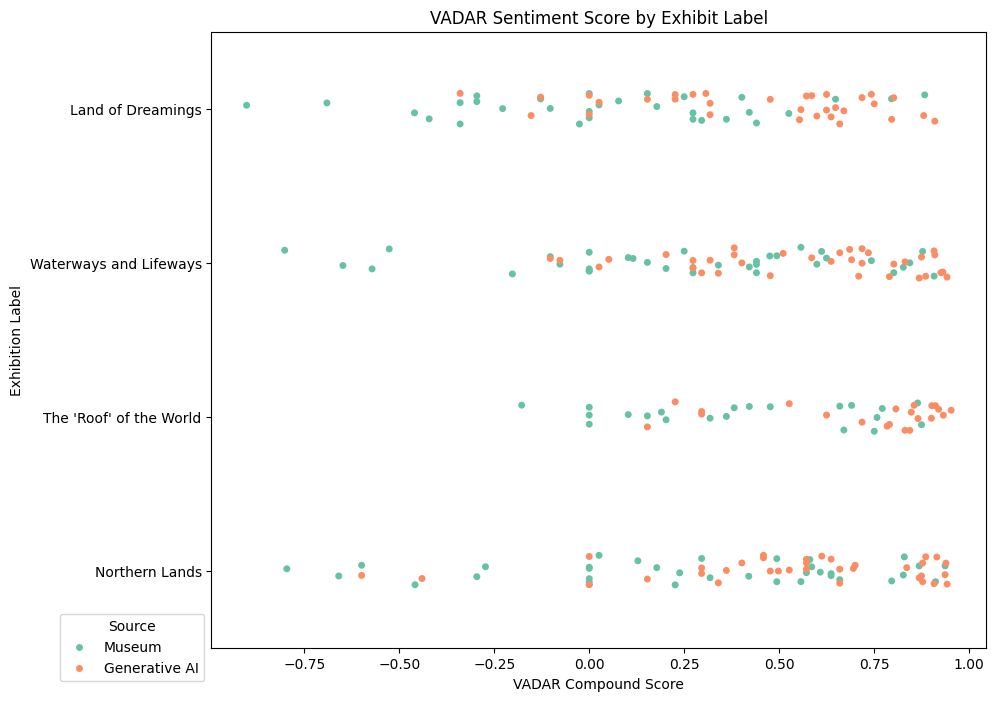

In [7]:
# Plot a stripplot representing compound VADAR score for each exhibit
fig, ax = plt.subplots(figsize=(10, 8))
sns.stripplot(
    data=df_sentiment_plt, 
    x="vadar_compound_score", 
    y="exhibit",
    hue = "Source",
    palette = "Set2",
    #dodge=True,
    ax=ax
)

ax.set_title('VADAR Sentiment Score by Exhibit Label')
ax.set_ylabel('Exhibition Label')
ax.set_xlabel('VADAR Compound Score')

sns.move_legend(
    ax, 
    "center right", 
    bbox_to_anchor=(0, 0)
)

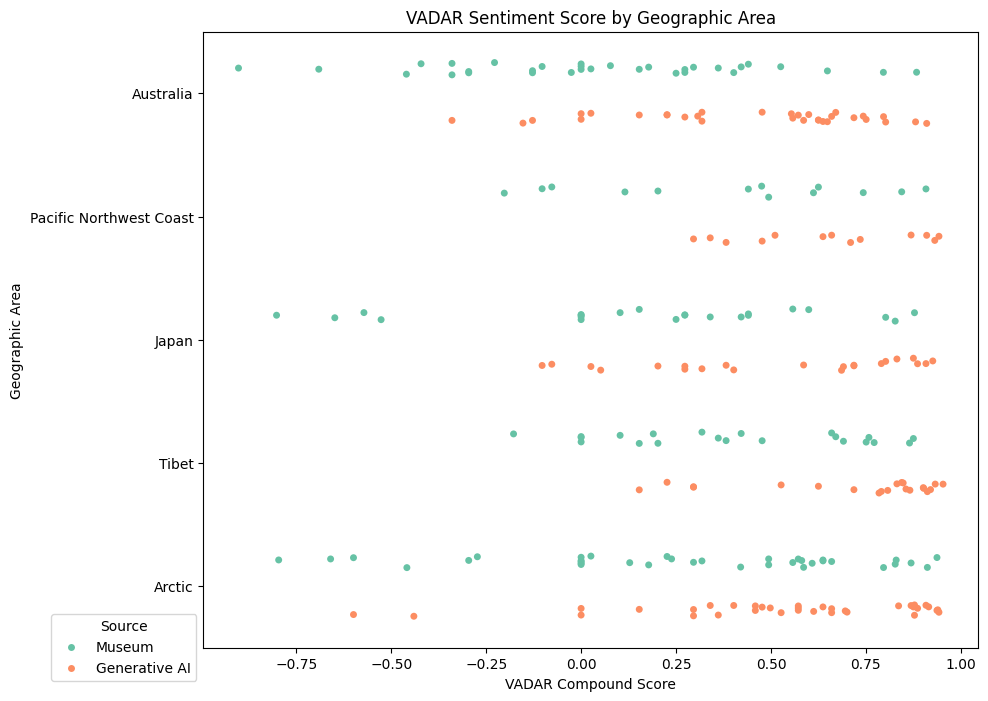

In [ ]:
# Plot a stripplot representing compound VADAR score for each geographic area
fig, ax = plt.subplots(figsize=(10, 8))

sns.stripplot(
    data=df_sentiment_plt, 
    x="vadar_compound_score", 
    y="geography",
    hue = "Source",
    palette = "Set2",
    dodge=True,
    ax=ax
)

ax.set_title('VADAR Sentiment Score by Geographic Area')
ax.set_ylabel('Geographic Area')
ax.set_xlabel('VADAR Compound Score')

sns.move_legend(
    ax, 
    "center right", 
    bbox_to_anchor=(0, 0)
)


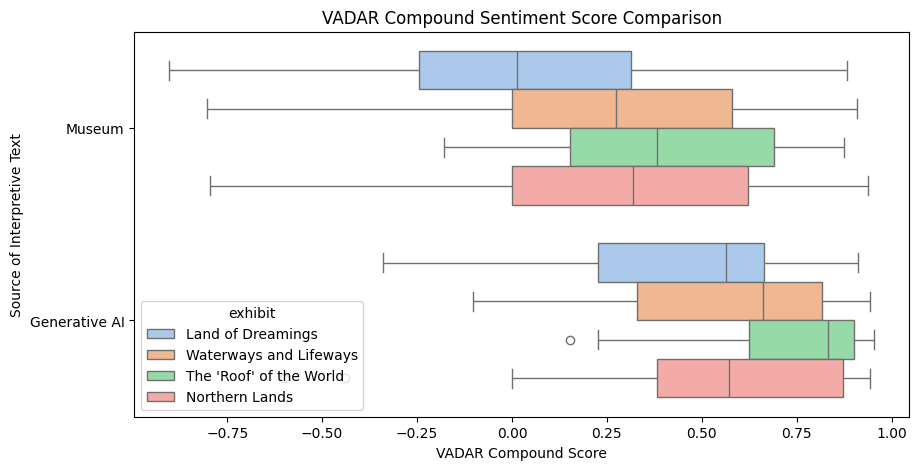

In [8]:
# Plots a boxplot for VADAR compound sentiment score comparison
fig, v_sen = plt.subplots(figsize=(10,5))
v_sen = sns.boxplot(
    x="vadar_compound_score", 
    y="Source", 
    data=df_sentiment_plt,
    hue='exhibit',
    palette='pastel',
    orient='h'  # horizontal orientation for better readability
)
v_sen.set_title('VADAR Compound Sentiment Score Comparison')
v_sen.set_ylabel('Source of Interpretive Text')
v_sen.set_xlabel('VADAR Compound Score')
plt.show()

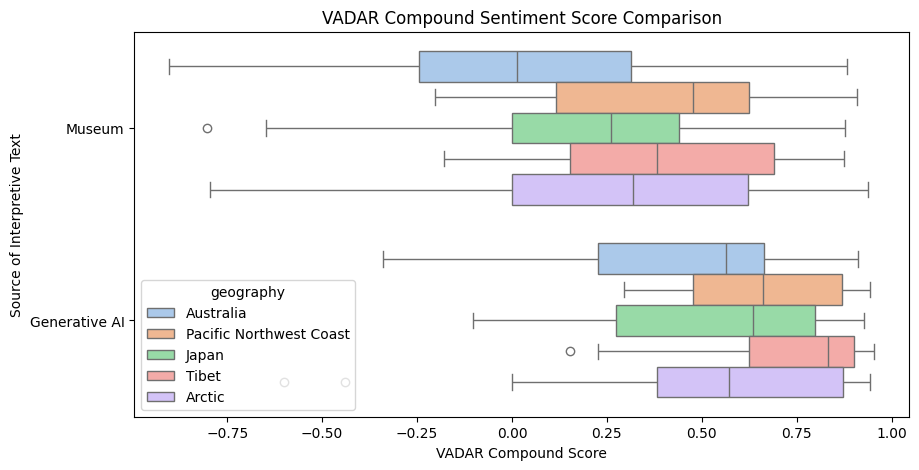

In [84]:
# Plots a boxplot for VADAR compound sentiment score comparison
fig, v_sen = plt.subplots(figsize=(10,5))
v_sen = sns.boxplot(
    x="vadar_compound_score", 
    y="Source", 
    data=df_sentiment_plt,
    hue='geography',
    palette='pastel',
    orient='h'  # horizontal orientation for better readability
)
v_sen.set_title('VADAR Compound Sentiment Score Comparison')
v_sen.set_ylabel('Source of Interpretive Text')
v_sen.set_xlabel('VADAR Compound Score')
plt.show()

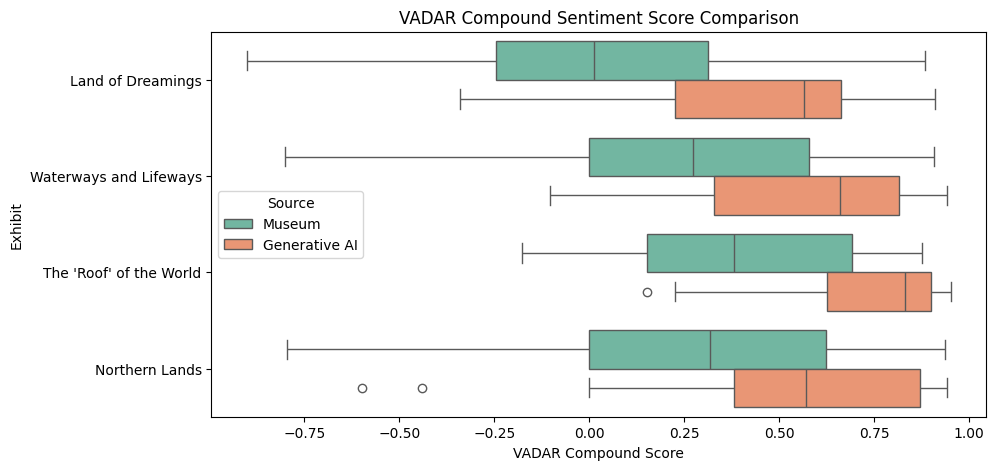

In [9]:
# Plots a boxplot for VADAR compound sentiment score comparison
fig, v_sen = plt.subplots(figsize=(10,5))
v_sen = sns.boxplot(
    x="vadar_compound_score", 
    y="exhibit", 
    data=df_sentiment_plt,
    hue='Source',
    palette='Set2',
    orient='h'  # horizontal orientation for better readability
)
v_sen.set_title('VADAR Compound Sentiment Score Comparison')
v_sen.set_ylabel('Exhibit')
v_sen.set_xlabel('VADAR Compound Score')
plt.show()

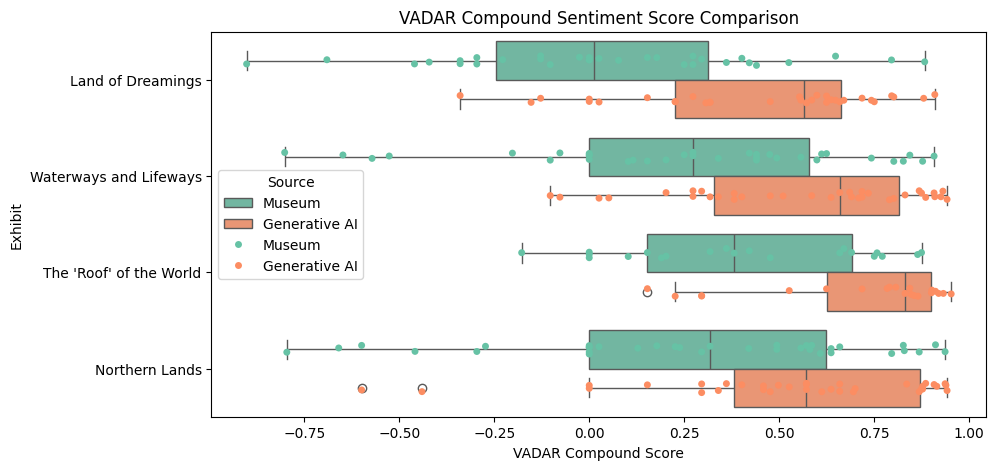

In [10]:
# Plots a boxplot for VADAR compound sentiment score comparison
fig, v_sen = plt.subplots(figsize=(10,5))
v_sen = sns.boxplot(
    x="vadar_compound_score", 
    y="exhibit", 
    data=df_sentiment_plt,
    hue='Source',
    palette='Set2',
    orient='h'  # horizontal orientation for better readability
)
sns.stripplot(
    data=df_sentiment_plt, 
    x="vadar_compound_score", 
    y="exhibit",
    hue = "Source",
    palette = "Set2",
    dodge=True,
    #ax=ax
)
v_sen.set_title('VADAR Compound Sentiment Score Comparison')
v_sen.set_ylabel('Exhibit')
v_sen.set_xlabel('VADAR Compound Score')
plt.show()

Go to the Workbooks directory and open the workbook titled "4_gusnet.ipynb" to continue with the analysis.